<a href="https://colab.research.google.com/github/wse2271/-Keras-study/blob/main/6_3code%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-3 순환 신경망의 고급 사용법 Code 실습



## Kaggle과 Google Colab 연동

In [ ]:
!pip install kaggle   # 셸 명령어 이용하여 kaggle Install
from google.colab import files # Kaggle에서 API Token Download 하고 colab 환경에 Upload
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"wse2271","key":"f513c76f0e6de1895965b106c64cd761"}'}

In [ ]:
!mkdir -p ~/.kaggle #.kaggle 디렉토리 생성(-p : 상위 경로도 함께 생성)
!cp kaggle.json ~/.kaggle/ #kaggle.json file 복사
!chmod 600 ~/.kaggle/kaggle.json #kaggle.json file 사용권한 변경(소유자에만 읽기쓰기 권한)


jena_climate_2009_2016.csv  kaggle.json  weather-archive-jena.zip


In [ ]:
!kaggle datasets download -d pankrzysiu/weather-archive-jena #kaggle에서 필요한 datasets API command 복사 

 38% 5.00M/13.2M [00:00<00:00, 17.9MB/s]
100% 13.2M/13.2M [00:00<00:00, 38.0MB/s]


In [ ]:
!unzip weather-archive-jena.zip #jena data 압축풀기

Archive:  weather-archive-jena.zip
  inflating: jena_climate_2009_2016.csv  


In [ ]:
!ls #디렉토리 리스트 확인

jena_climate_2009_2016.csv  kaggle.json  sample_data  weather-archive-jena.zip


## Google Colab과 Google Drive 연동

In [ ]:
from google.colab import drive  #Google Colab과 Google Drive 연결
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks/kaggle


/content/gdrive/My Drive/Colab Notebooks/kaggle


In [ ]:
!pwd #현재 경로 보기

/content/gdrive/My Drive/Colab Notebooks/kaggle


In [ ]:
!kaggle datasets download -d pankrzysiu/weather-archive-jena #kaggle에서 필요한 datasets API command 복사

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip englishfrench-translations.zip  #jena data 압축풀기

unzip:  cannot find or open englishfrench-translations.zip, englishfrench-translations.zip.zip or englishfrench-translations.zip.ZIP.


In [ ]:
!ls #디렉토리 리스트 확인

jena_climate_2009_2016.csv  kaggle.json  weather-archive-jena.zip


## jena weather Datasets 확인 

In [ ]:
import pandas as pd 

#pandas DataFrame 형식으로 Datasets 확인
df1 = pd.read_csv('jena_climate_2009_2016.csv')
df1.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
import os

data_dir = '/content/gdrive/My Drive/Colab Notebooks/kaggle'  #Datasets 경로 생성
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname) #Datasets read
data = f.read()
f.close()

lines = data.split('\n') #이스케이프 문자 활용하여 rows 분할
header = lines[0].split(',') 
lines = lines[1:]

print(header) 
print(len(lines))
lines[1]

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


'01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10'

In [ ]:
import numpy as np 

#Numpy array 형식으로 변환
float_data = np.zeros((len(lines), len(header) - 1))  
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [ ]:
float_data.shape 

(420551, 14)

In [ ]:
float_data #정규화 하기 전 data 확인

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

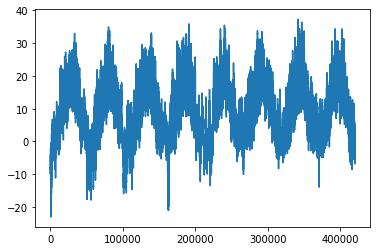

In [ ]:
from matplotlib import pyplot as plt #09~16년 Data 시각화
temp = float_data[:, 1]  # 온도(섭씨)
plt.plot(range(len(temp)), temp)
plt.show()

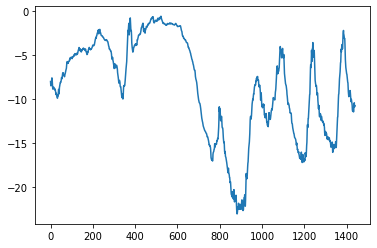

In [ ]:
plt.plot(range(1440), temp[:1440]) #10일간의 Data 시각화
plt.show()

# Data 전처리 및 준비


## 정규화 (0~1 구간으로 변경)
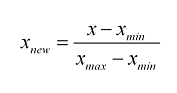

##표준화(데이터 0을 중심으로 양쪽으로 데이터를 분포)
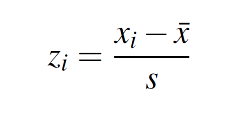

In [ ]:
mean = float_data[:200000].mean(axis=0)  #표준화 진행
float_data -= mean
print(mean)
float_data

[ 2.35142852e-12 -6.28273600e-15  7.46772859e-13 -1.21087956e-14
  2.42951509e-14  4.34444314e-15 -6.97213176e-15 -1.16579003e-14
  2.78895790e-14  7.98244804e-16 -1.30972425e-13  1.37250925e-14
 -5.88101390e-14 -2.93813751e-15]


In [ ]:
std = float_data[:200000].std(axis=0) #표준화 진행
float_data /= std
print(std)
float_data

array([[ 0.90014748, -1.93135845, -1.98211036, ..., -0.72950452,
        -0.78067973, -0.27613603],
       [ 0.9060434 , -1.97541381, -2.02567   , ..., -0.93124017,
        -0.88794488, -0.46317443],
       [ 0.90132666, -1.98671006, -2.03683914, ..., -1.27614304,
        -1.26122763, -0.05330633],
       ...,
       [ 1.28927851, -1.38236094, -1.46721307, ..., -0.69696652,
        -0.67341457,  0.45008097],
       [ 1.28809932, -1.50323076, -1.58672285, ..., -0.43015486,
        -0.60476487,  0.57246412],
       [ 1.28927851, -1.56987861, -1.65150386, ..., -0.5993525 ,
        -0.690577  ,  0.10024989]])

In [ ]:
#제너레이터 형식으로 samples, targets Data 반환 함수
def generator(data, lookback, delay, min_index, max_index,              
              shuffle=False, batch_size=128, step=6):
    if max_index is None:   #max_index 없을시 24시간 전 data까지 max_index 설정
        max_index = len(data) - delay - 1
    i = min_index + lookback  #index 설정
    while 1:
        if shuffle: #shuffle True 설정 시 random index 반환(batch_size만큼 반환)
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else: #shuffle False 설정 시 순서대로 index 반환
            if i + batch_size >= max_index:  #max_index 넘으면 초기부터 반환
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),           
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):           #samples, targets data 반환
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices] #10일 간의 Data를 1시간 step으로 정리 
            targets[j] = data[rows[j] + delay][1] #24시간 후의 섭씨data 반환
        yield samples, targets

In [ ]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

#상식 수준의 기준점

##평균 절댓값 오차(MAE) 평가
### 24시간 후 온도가 지금과 동일하다고 예측
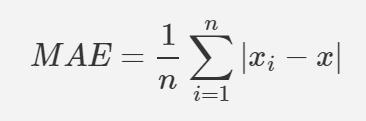
     

In [ ]:
def evaluate_naive_method(): #MAE값 구하기
    batch_maes = []
    for step in range(val_steps): 
        samples, targets = next(val_gen)  #next명령어로 val_gen값 1회 출력 
        preds = samples[:, -1, 1]   #섭씨온도만 반환
        mae = np.mean(np.abs(preds - targets)) #측정값과 실제값 마이너스
        batch_maes.append(mae)  
    print(np.mean(batch_maes))  #갯수만큼 평균값 구하기
    
evaluate_naive_method()

0.2897359729905486


In [ ]:
0.29 * std[1] #표준편차 곱하여 섭씨온도 구하기

2.5672247338393395

#기본적인 머신 러닝 방법

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')  
history = model.fit_generator(train_gen,
                              steps_per_epoch=500, #한 epoch 마다 반복 횟수
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps) #검증 반복 횟수 설정, val_gen 값은 무한루프이므로 꼭 설정해주기!!

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 24s 23ms/step - loss: 2.4958 - val_loss: 0.7788
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.8373 - val_loss: 0.3605
Epoch 3/20
500/500 [==============================] - 11s 22ms/step - loss: 0.3763 - val_loss: 0.3015
Epoch 4/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2801 - val_loss: 0.3350
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2609 - val_loss: 0.3003
Epoch 6/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2485 - val_loss: 0.3768
Epoch 7/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2400 - val_loss: 0.3159
Epoch 8/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2354 - val_loss: 0.3396
Epoch 9/20
500/500 [==============================] - 11s 22ms/step - loss: 0.2316 - val_loss: 0.3139
Epoch 10/20
500/500 [==============================] - 11s 22ms/step - loss: 0.226

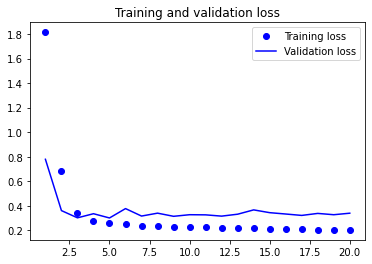

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#첫번째 순환 신경망

##LSTM
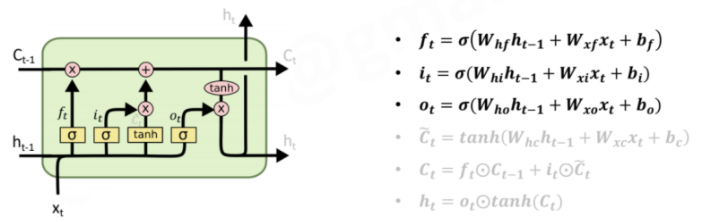

##GRU
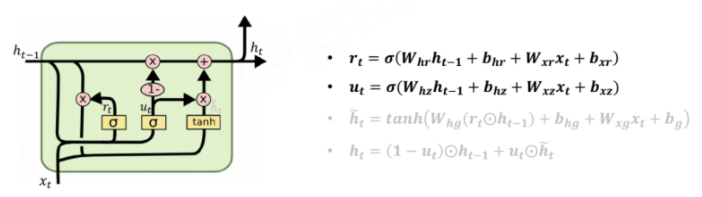

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 20s 30ms/step - loss: 0.3434 - val_loss: 0.2707
Epoch 2/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2853 - val_loss: 0.2641
Epoch 3/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2767 - val_loss: 0.2651
Epoch 4/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2711 - val_loss: 0.2648
Epoch 5/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2685 - val_loss: 0.2756
Epoch 6/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2618 - val_loss: 0.2700
Epoch 7/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2568 - val_loss: 0.2685
Epoch 8/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2537 - val_loss: 0.2684
Epoch 9/20
500/500 [==============================] - 14s 28ms/step - loss: 0.2466 - val_loss: 0.2723
Epoch 10/20
500/500 [==============================] - 14s 28ms/step - loss: 0.243

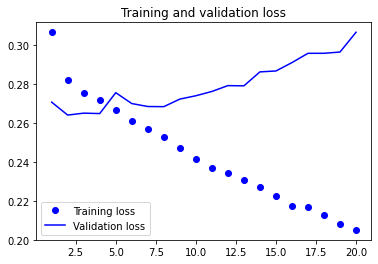

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#순환 드롭아웃 사용

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,  #입력에 대한 드롭아웃 비율 설정
                     recurrent_dropout=0.2,  #순환상태의 드롭아웃 비율 설정
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
500/500 [==============================] - 171s 295ms/step - loss: 0.3627 - val_loss: 0.2776
Epoch 2/40
500/500 [==============================] - 147s 294ms/step - loss: 0.3068 - val_loss: 0.2766
Epoch 3/40
500/500 [==============================] - 147s 294ms/step - loss: 0.3020 - val_loss: 0.2743
Epoch 4/40
500/500 [==============================] - 146s 292ms/step - loss: 0.2985 - val_loss: 0.2864
Epoch 5/40
500/500 [==============================] - 147s 294ms/step - loss: 0.2945 - val_loss: 0.2707
Epoch 6/40
500/500 [==============================] - 146s 292ms/step - loss: 0.2917 - val_loss: 0.2696
Epoch 7/40
500/500 [==============================] - 145s 291ms/step - loss: 0.2857 - val_loss: 0.2719
Epoch 8/40
500/500 [==============================] - 146s 293ms/step - loss: 0.2825 - val_loss: 0.2665
Epoch 9/40
500/500 [==============================] - 147s 294ms/step - loss: 0.2805 - val_loss: 0.2702
Epoch 10/40
500/500 [==============================] - 146s 292m

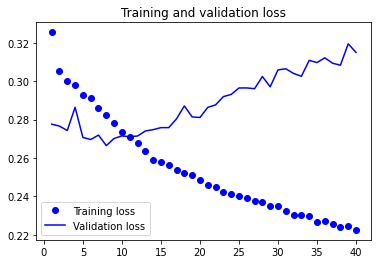

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#스태킹 순환층

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True, #전체 시퀀스 출력
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
500/500 [==============================] - 414s 814ms/step - loss: 0.3414 - val_loss: 0.2776
Epoch 2/40
500/500 [==============================] - 407s 814ms/step - loss: 0.3032 - val_loss: 0.2770
Epoch 3/40
500/500 [==============================] - 407s 815ms/step - loss: 0.2952 - val_loss: 0.2640
Epoch 4/40
500/500 [==============================] - 407s 815ms/step - loss: 0.2902 - val_loss: 0.2684
Epoch 5/40
500/500 [==============================] - 408s 816ms/step - loss: 0.2807 - val_loss: 0.2696
Epoch 6/40
500/500 [==============================] - 407s 814ms/step - loss: 0.2764 - val_loss: 0.2664
Epoch 7/40
500/500 [==============================] - 407s 815ms/step - loss: 0.2690 - val_loss: 0.2765
Epoch 8/40
500/500 [==============================] - 408s 816ms/step - loss: 0.2667 - val_loss: 0.2786
Epoch 9/40
500/500 [==============================] - 407s 815ms/step - loss: 0.2597 - val_loss: 0.2722
Epoch 10/40
500/500 [==============================] - 407s 813m

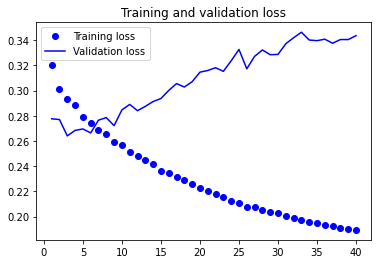

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#양방향 RNN

In [ ]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets
        
train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step, 
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [ ]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


##텍스트 데이터셋 양방향 RNN

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 500

# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 시퀀스를 뒤집습니다
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# 시퀀스에 패딩을 추가합니다
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:

from keras import backend as K
K.clear_session()

In [ ]:

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(
    layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)